In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

import wandb


df = pd.read_csv("../../data/csv/cleaned_fix.csv")

In [2]:
selected_columns = ["Image", "Scene", "ROI", "FixDur", "FixNr", "Start", "End", "X", "Y", "Name", "NextROI"]
X = df[selected_columns]

#X = df.iloc[:, :-1]  # first 11 columns as features
y = df.iloc[:, -1]   # last column as target

In [3]:
X

,Image,Scene,ROI,FixDur,FixNr,Start,End,X,Y,Name,NextROI
0,1,1,0,103.0,1.0,7.0,109.0,510.9,381.0,Back_wall,Bottle_on_table
1,1,1,22,77.0,2.0,236.0,312.0,450.8,307.0,Curtains,Floor
2,1,1,9,300.0,3.0,347.0,646.0,414.5,447.9,Back_chair,Body
3,1,1,8,165.0,4.0,687.0,851.0,468.6,619.1,Floor,Elsewhere
4,1,1,0,461.0,5.0,876.0,1336.0,465.4,687.9,Body,Elsewhere
...,...,...,...,...,...,...,...,...,...,...,...
30130,2,3,7,243.0,71.0,25535.0,25777.0,307.6,524.2,Table,NaN
30131,2,3,13,274.0,72.0,25829.0,26102.0,530.8,385.8,Right_plate,NaN
30132,2,3,14,374.0,73.0,26136.0,26509.0,623.9,466.2,Right_fork,NaN
30133,2,3,7,170.0,74.0,26578.0,26747.0,305.1,542.6,Table,NaN


In [4]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [5]:
X_numeric = X.select_dtypes(include=['int64', 'float64'])  # Keep only numeric columns
X_scaled = StandardScaler().fit_transform(X_numeric)


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42)


In [7]:
X_train

array([[ 1.09557175,  0.15831651, -0.51081907, ..., -1.02602357,
        -0.85267675, -0.71333533],
       [-0.91276541,  0.15831651,  0.66714848, ...,  0.02474823,
         0.72267954, -1.29317671],
       [-0.91276541,  1.38855586, -0.80531096, ..., -0.22677781,
        -1.79432828,  1.31431985],
       ...,
       [ 1.09557175,  1.38855586,  0.96164037, ..., -0.20596767,
         0.30692797,  1.31014403],
       [-0.91276541, -1.07192283, -1.24704879, ...,  0.45959598,
        -1.34342297,  1.85538582],
       [ 1.09557175,  1.38855586, -0.21632718, ..., -0.67441638,
        -0.05117147,  1.43482186]])

In [8]:
# print(X_train.dtype)
# print(y_train.dtype)

In [9]:
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(9,)),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(32, activation='relu'),
    
    layers.Dense(4, activation='softmax')
])

/home/sam/anaconda3/envs/tf310/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
W0000 00:00:1748282531.809301 1766850 gpu_device.cc:2341] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [10]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])  # Use 'binary_crossentropy' for classification

In [11]:
history = model.fit(X_train, y_train, epochs=500, batch_size=64, validation_split=0.1)

Epoch 1/500
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.2593 - loss: 1.5779 - val_accuracy: 0.2800 - val_loss: 1.3623
Epoch 2/500
340/340 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2899 - loss: 1.3945 - val_accuracy: 0.3409 - val_loss: 1.3233
Epoch 3/500
340/340 ━━━━━━━━━━━━━━━━━━━━ 0s 976us/step - accuracy: 0.3248 - loss: 1.3505 - val_accuracy: 0.3737 - val_loss: 1.2784
Epoch 4/500
340/340 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3405 - loss: 1.3268 - val_accuracy: 0.3866 - val_loss: 1.2555
Epoch 5/500
340/340 ━━━━━━━━━━━━━━━━━━━━ 0s 987us/step - accuracy: 0.3537 - loss: 1.3000 - val_accuracy: 0.4065 - val_loss: 1.2253
Epoch 6/500
340/340 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3659 - loss: 1.2828 - val_accuracy: 0.4164 - val_loss: 1.2133
Epoch 7/500
340/340 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3804 - loss: 1.2699 - val_accuracy: 0.4359 - val_loss: 1.1948
Epoch 8/500
340/340 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3819 - loss: 1.2604 - val_

In [12]:
model.evaluate(X_test, y_test)

189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 697us/step - accuracy: 0.5367 - loss: 0.9815


[0.9734581708908081, 0.5379127264022827]

In [13]:
# import matplotlib.pyplot as plt

# plt.plot(history.history['accuracy'], label='train acc')
# plt.plot(history.history['val_accuracy'], label='val acc')
# plt.legend()
# plt.show()


In [14]:
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"\nTest Loss: {test_loss:.4f}, Test MAE: {test_mae:.4f}")

189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 626us/step - accuracy: 0.5367 - loss: 0.9815

Test Loss: 0.9735, Test MAE: 0.5379


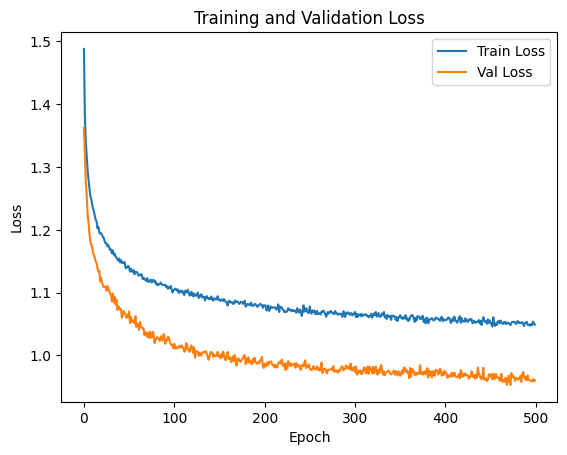

In [15]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 600us/step


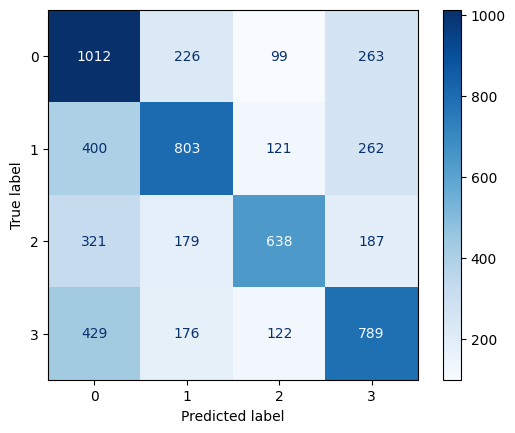

In [16]:
# No need to use np.argmax since y_test is already class indices
y_true = y_test
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)  # Get predicted class indices

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.show()

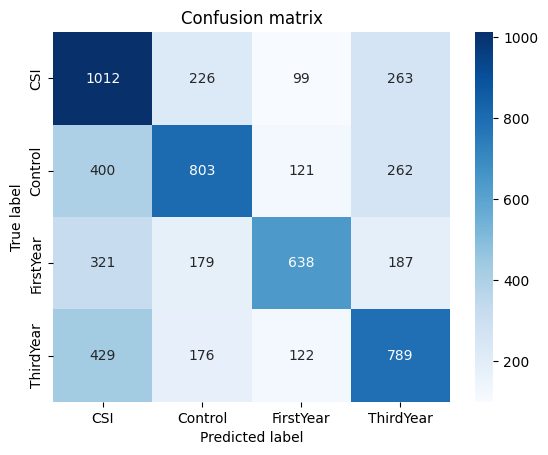

In [20]:
import seaborn as sns

sns.heatmap(cm, annot=True, fmt='d', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_, cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion matrix')
plt.show()

In [17]:
# Print classification report
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=label_encoder.classes_))

Classification Report:
              precision    recall  f1-score   support

         CSI       0.47      0.63      0.54      1600
     Control       0.58      0.51      0.54      1586
   FirstYear       0.65      0.48      0.55      1325
   ThirdYear       0.53      0.52      0.52      1516

    accuracy                           0.54      6027
   macro avg       0.56      0.54      0.54      6027
weighted avg       0.55      0.54      0.54      6027

